# Read test data

### 1. Get Filepaths


In [1]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [2]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/AFFF_PetersonBucket.csv


### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.


In [3]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"minima"`, and the minimum is set to `0` (default=6), because peak picking occured before the .pks list was generated. The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.


/home/corems/corems/mass_spectrum/calc/PeakPicking.py:640: UserWarning: Auto threshould is disabled for centroid data, returning 0
  warnings.warn(


182337


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

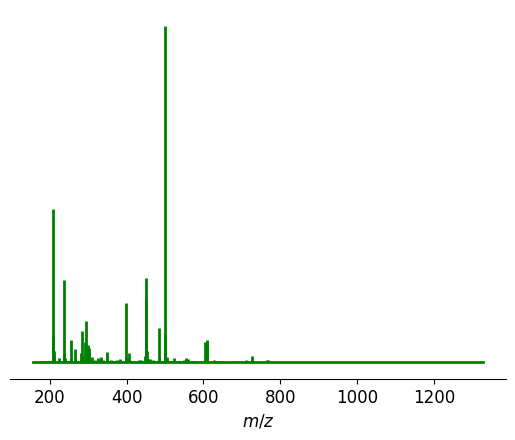

In [4]:
# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "minima"
MSParameters.mass_spectrum.noise_threshold_min_std = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Specify file path
file_location = filepaths[
    5
]  # 2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks

mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_centroid()

The 20 most abundant peaks follow.  

1. 498.930183 corresponds to C8HF17O3S (PFOS)
2. 209.085295 corresponds to C8H18O4S (octyl hydrogen sulfate or thiol-PEG4-alcohol?)

In [5]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(f"{i+1}: {mspeak.mz_exp:.6f} m/z, {mspeak.abundance:.2f} abundance, {mspeak.signal_to_noise:.1f} S/N")

Most abundant peaks (top 20):
1: 498.930183 m/z, 100.00 abundance, 199053.4 S/N
2: 209.085295 m/z, 45.52 abundance, 90611.3 S/N
3: 451.228679 m/z, 25.12 abundance, 49992.4 S/N
4: 237.116610 m/z, 24.45 abundance, 48670.6 S/N
5: 450.232310 m/z, 18.61 abundance, 37038.3 S/N
6: 398.936608 m/z, 17.42 abundance, 34672.2 S/N
7: 293.156042 m/z, 12.04 abundance, 23955.7 S/N
8: 483.041732 m/z, 10.16 abundance, 20224.1 S/N
9: 283.264254 m/z, 9.26 abundance, 18427.3 S/N
10: 499.933536 m/z, 8.38 abundance, 16676.1 S/N
11: 498.932764 m/z, 8.33 abundance, 16583.7 S/N
12: 209.085360 m/z, 8.01 abundance, 15932.7 S/N
13: 255.232956 m/z, 6.48 abundance, 12895.4 S/N
14: 609.301350 m/z, 6.44 abundance, 12814.7 S/N
15: 608.304965 m/z, 6.37 abundance, 12677.3 S/N
16: 498.926249 m/z, 6.34 abundance, 12618.5 S/N
17: 605.045472 m/z, 5.85 abundance, 11647.3 S/N
18: 498.918903 m/z, 5.83 abundance, 11607.6 S/N
19: 292.159677 m/z, 5.78 abundance, 11505.0 S/N
20: 299.201656 m/z, 5.14 abundance, 10239.5 S/N


/home/corems/corems/mass_spectrum/calc/PeakPicking.py:640: UserWarning: Auto threshould is disabled for centroid data, returning 0
  warnings.warn(


94492


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

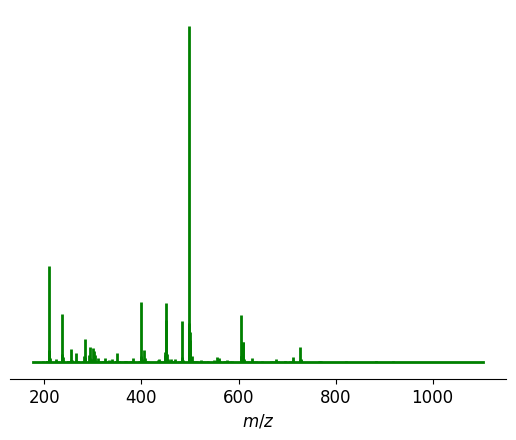

In [6]:
# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "minima"
MSParameters.mass_spectrum.noise_threshold_min_std = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Specify file path
file_location = filepaths[
    4
]  # 2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks

mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_centroid()

In [7]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(f"{i+1}: {mspeak.mz_exp:.6f} m/z, {mspeak.abundance:.2f} abundance, {mspeak.signal_to_noise:.1f} S/N")

Most abundant peaks (top 20):
1: 498.930248 m/z, 100.00 abundance, 186322.9 S/N
2: 209.085310 m/z, 28.63 abundance, 53344.8 S/N
3: 398.936605 m/z, 17.97 abundance, 33485.6 S/N
4: 451.228758 m/z, 17.47 abundance, 32552.2 S/N
5: 237.116609 m/z, 14.36 abundance, 26754.5 S/N
6: 605.045720 m/z, 13.85 abundance, 25796.8 S/N
7: 450.232378 m/z, 12.44 abundance, 23180.2 S/N
8: 483.041643 m/z, 12.09 abundance, 22518.1 S/N
9: 498.933029 m/z, 11.72 abundance, 21834.4 S/N
10: 498.926321 m/z, 11.06 abundance, 20607.6 S/N
11: 498.918965 m/z, 9.62 abundance, 17922.8 S/N
12: 499.933557 m/z, 8.96 abundance, 16697.1 S/N
13: 498.929003 m/z, 7.43 abundance, 13843.4 S/N
14: 283.264254 m/z, 6.88 abundance, 12814.7 S/N
15: 498.940133 m/z, 6.38 abundance, 11887.5 S/N
16: 609.301571 m/z, 6.00 abundance, 11168.6 S/N
17: 608.305189 m/z, 5.83 abundance, 10859.0 S/N
18: 498.912103 m/z, 4.86 abundance, 9060.7 S/N
19: 727.049196 m/z, 4.54 abundance, 8447.5 S/N
20: 500.925973 m/z, 4.45 abundance, 8281.5 S/N


/home/corems/corems/mass_spectrum/calc/PeakPicking.py:640: UserWarning: Auto threshould is disabled for centroid data, returning 0
  warnings.warn(


9585


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

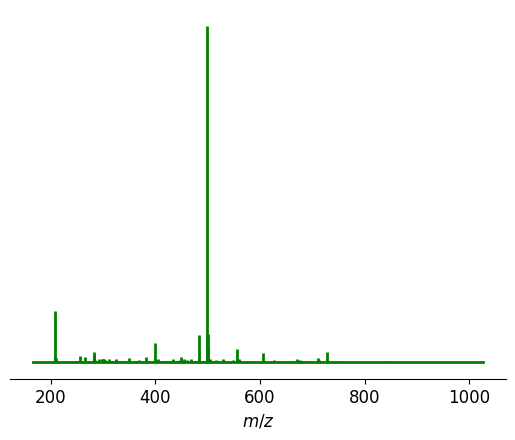

In [8]:
# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "minima"
MSParameters.mass_spectrum.noise_threshold_min_std = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Specify file path
file_location = filepaths[
    6
]  # 2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks

mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_centroid()

Each peak in the mass spectrum is represented by a MassSpecCentroid object with ion_charge, mass, abundance, S/N and other values.


In [9]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(f"{i+1}: {mspeak.mz_exp:.6f} m/z, {mspeak.abundance:.2f} abundance, {mspeak.signal_to_noise:.1f} S/N")

Most abundant peaks (top 20):
1: 498.930216 m/z, 100.00 abundance, 132255.0 S/N
2: 209.085287 m/z, 15.30 abundance, 20230.3 S/N
3: 498.933101 m/z, 8.35 abundance, 11035.3 S/N
4: 499.933578 m/z, 8.19 abundance, 10833.1 S/N
5: 483.041744 m/z, 8.14 abundance, 10759.4 S/N
6: 498.926367 m/z, 7.71 abundance, 10197.1 S/N
7: 498.919013 m/z, 6.85 abundance, 9054.9 S/N
8: 398.936606 m/z, 5.69 abundance, 7525.1 S/N
9: 498.940189 m/z, 4.55 abundance, 6014.5 S/N
10: 500.926026 m/z, 4.43 abundance, 5856.8 S/N
11: 555.062790 m/z, 3.92 abundance, 5182.6 S/N
12: 498.912144 m/z, 3.43 abundance, 4539.7 S/N
13: 283.264254 m/z, 2.97 abundance, 3924.8 S/N
14: 727.049257 m/z, 2.93 abundance, 3873.8 S/N
15: 605.045475 m/z, 2.66 abundance, 3520.4 S/N
16: 498.948536 m/z, 2.62 abundance, 3469.8 S/N
17: 498.905208 m/z, 2.14 abundance, 2824.3 S/N
18: 283.122080 m/z, 1.97 abundance, 2597.9 S/N
19: 498.956575 m/z, 1.78 abundance, 2359.2 S/N
20: 255.232954 m/z, 1.64 abundance, 2168.9 S/N


/home/corems/corems/mass_spectrum/calc/PeakPicking.py:640: UserWarning: Auto threshould is disabled for centroid data, returning 0
  warnings.warn(


11846


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

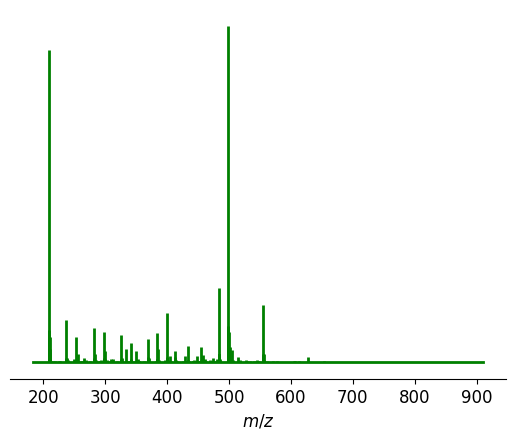

In [11]:
# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "minima"
MSParameters.mass_spectrum.noise_threshold_min_std = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Specify file path
file_location = filepaths[
    7
]  # 2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks

mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_centroid()

In [12]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(f"{i+1}: {mspeak.mz_exp:.6f} m/z, {mspeak.abundance:.2f} abundance, {mspeak.signal_to_noise:.1f} S/N")

Most abundant peaks (top 20):
1: 498.930186 m/z, 100.00 abundance, 72576.4 S/N
2: 209.085296 m/z, 92.97 abundance, 67475.7 S/N
3: 483.041733 m/z, 22.07 abundance, 16019.5 S/N
4: 555.062885 m/z, 16.96 abundance, 12311.5 S/N
5: 398.936596 m/z, 14.71 abundance, 10672.9 S/N
6: 237.116594 m/z, 12.56 abundance, 9115.9 S/N
7: 498.933164 m/z, 10.82 abundance, 7851.5 S/N
8: 498.926410 m/z, 10.15 abundance, 7366.1 S/N
9: 281.142818 m/z, 9.99 abundance, 7248.1 S/N
10: 209.084788 m/z, 9.45 abundance, 6855.5 S/N
11: 498.919076 m/z, 9.07 abundance, 6585.2 S/N
12: 499.933551 m/z, 8.92 abundance, 6471.9 S/N
13: 297.137733 m/z, 8.79 abundance, 6380.7 S/N
14: 383.048129 m/z, 8.50 abundance, 6170.4 S/N
15: 325.169036 m/z, 8.05 abundance, 5842.9 S/N
16: 210.088659 m/z, 7.46 abundance, 5410.0 S/N
17: 253.111514 m/z, 7.32 abundance, 5314.9 S/N
18: 369.195234 m/z, 6.74 abundance, 4892.5 S/N
19: 209.085379 m/z, 6.51 abundance, 4726.3 S/N
20: 209.085150 m/z, 6.10 abundance, 4427.4 S/N
